# PROJECT 

### To Do - Predict the price of Houses in King County State
### Author - Mridul Katoch

## Visualization and Data Preprocessing 
## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\mridu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

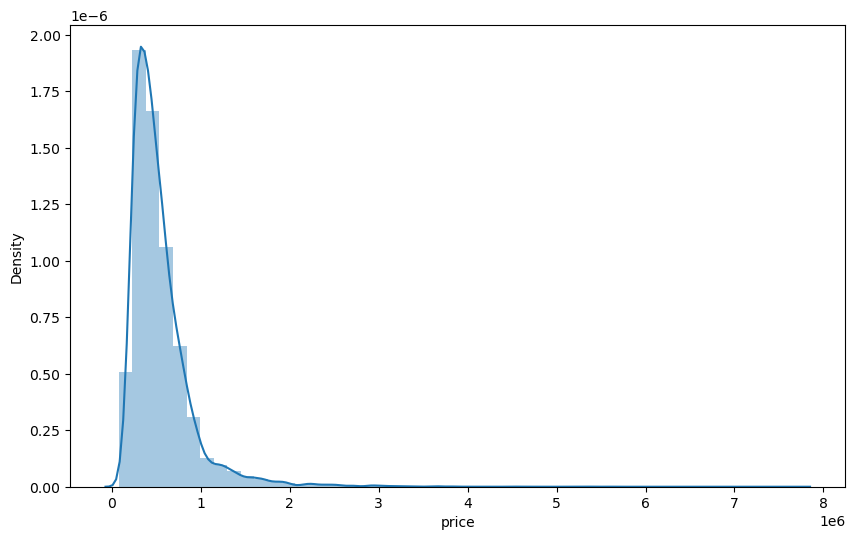

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])


##### By seeing the above graph we can interpret that:
##### 1)There are few outliers in our dataset ranging from 2000000 to 8000000
##### 2)The density of these outliers are also even less
##### 3)We have to remove the outliers to increase the accuracy of our model
##### 4)Most of the house prices lies between 100000 to 2000000
##### 5)Will be focusing in this range to get more precise predictions


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

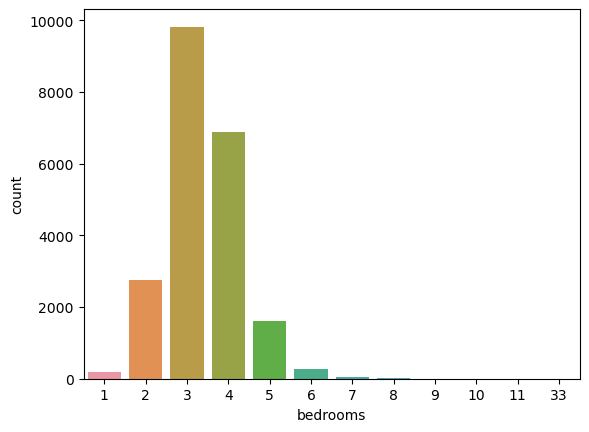

In [8]:
sns.countplot(x='bedrooms',data=df)
#another method : df['bedrooms'].value_counts().plot.bar()

##### Therefore, most bedrooms are in the range of 2-5 with an extreme outlier of 33 bedrooms which we will be ignoring  

In [9]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:>

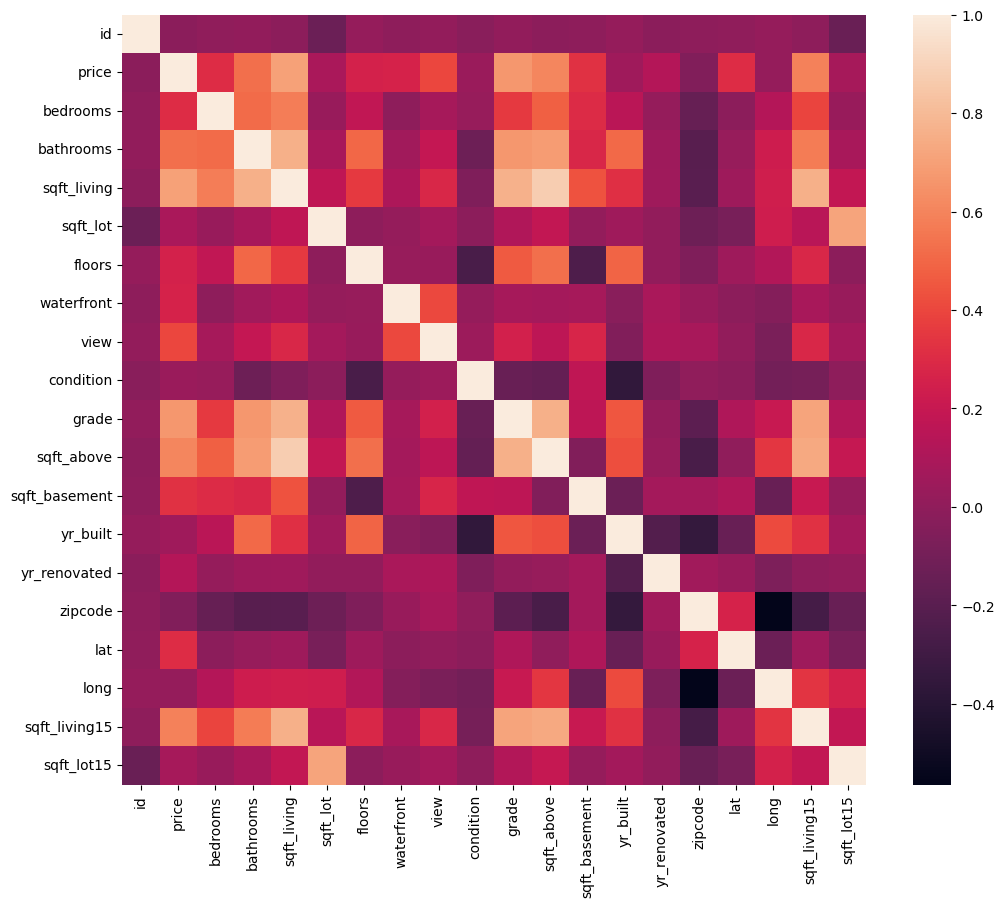

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

##### Our target column i.e. price is highly positively correlated with
##### 1)sqft_living
##### 2)grade
##### 3)sqft_above

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

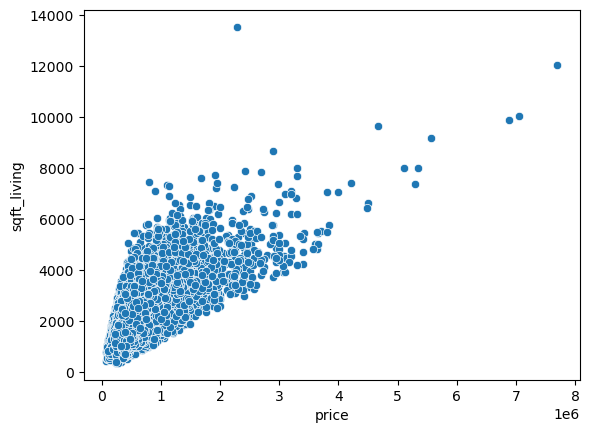

In [11]:
sns.scatterplot(x='price',y='sqft_living',data=df)

##### Again we can observe that the main chunk of data lies between 100000 to 2000000

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

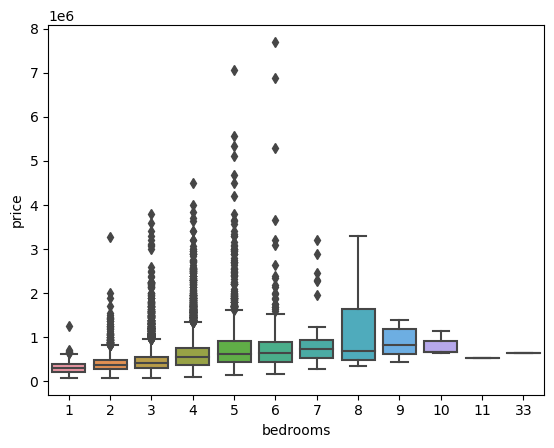

In [12]:
sns.boxplot(x='bedrooms',y='price',data=df)

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
# Focusing on latitudes and longitudes 

<AxesSubplot:xlabel='price', ylabel='lat'>

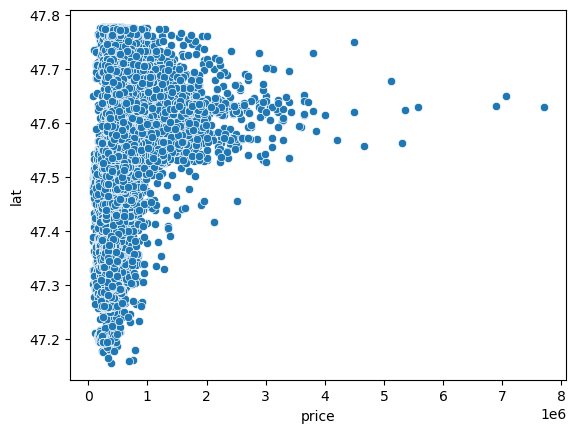

In [15]:
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

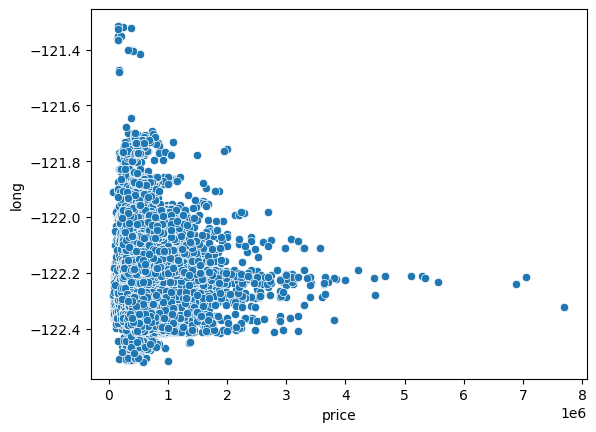

In [16]:
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

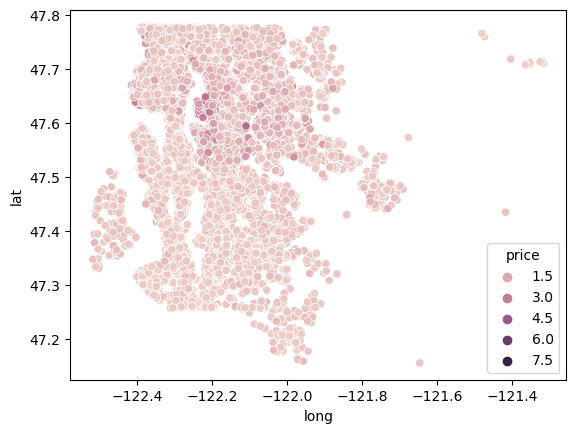

In [17]:
sns.scatterplot(x='long',y='lat',data=df,hue='price')

##### King County map with points colour indicating in difference of prices of homes

In [18]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [19]:
#Length of the dataframe
len(df)

21597

In [20]:
#Number of homes coming in top 0.9% according to price
len(df)*0.009

194.373

##### We can remove that much amount of data with no effect on our model. Moreover, these houses comes under the outliers category

In [21]:
non_top_1= df.sort_values('price',ascending=False).iloc[173:]

<AxesSubplot:xlabel='long', ylabel='lat'>

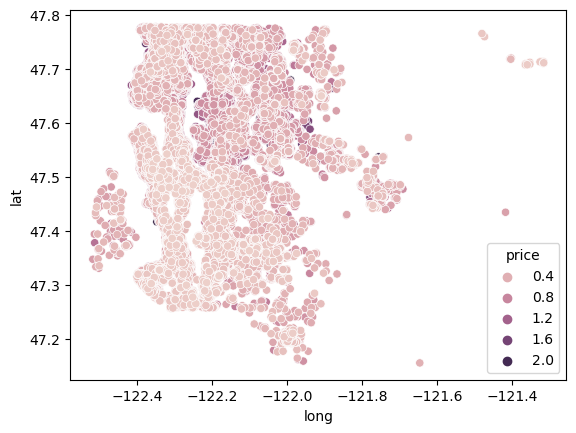

In [22]:
sns.scatterplot(x='long',y='lat',data=non_top_1,hue='price')

C:\Users\mridu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

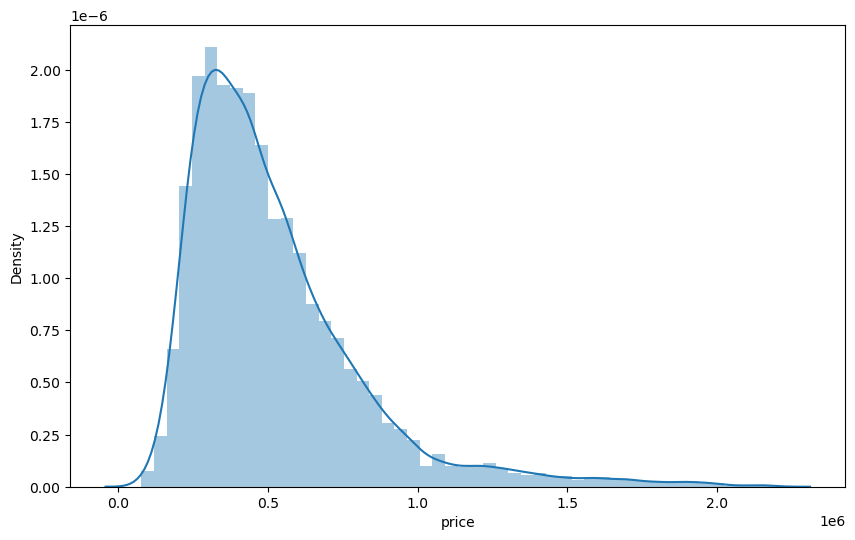

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(non_top_1['price'])

##### Now range is restricted to 100000 to 2000000

<AxesSubplot:xlabel='waterfront', ylabel='price'>

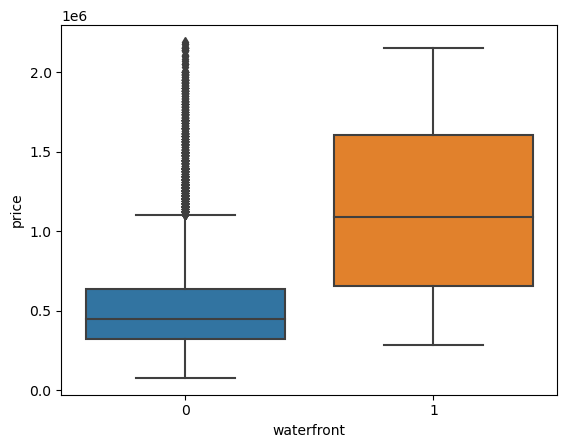

In [24]:
sns.boxplot(x='waterfront',y='price',data=non_top_1)

##### Waterfront Homes are of greater prices

In [25]:
df=non_top_1

In [26]:
#ID has no benefit for our model, therefore, we will drop the id column
df=df.drop('id',axis=1)

In [27]:
# Our date has an object datatype. We will convert in into daytime so 
# that we can extract 
df['date']=pd.to_datetime(df['date'])

In [28]:
df['date']

8215    2014-12-09
6995    2014-12-08
18867   2014-07-08
19308   2014-08-20
15138   2015-03-18
           ...    
2139    2014-05-08
8267    2014-11-05
16184   2015-03-24
465     2014-05-23
15279   2014-05-06
Name: date, Length: 21424, dtype: datetime64[ns]

In [29]:
# Extracting year and month from date column
df['year']=df['date'].apply(lambda date:date.year)
df['month']=df['date'].apply(lambda date:date.month)
# Another method
#def year_extraction(date):
#  return date.year
#df['year']=df.apply(lambda x:year_extraction(x['date']))

In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
8215,2014-12-09,2190000.0,3,2.25,3360,7108,2.0,0,0,3,...,590,1905,2004,98112,47.6187,-122.284,3450,8558,2014,12
6995,2014-12-08,2180000.0,4,3.00,4750,21701,1.5,0,0,5,...,0,1976,0,98004,47.6454,-122.218,3120,18551,2014,12
18867,2014-07-08,2180000.0,6,2.75,4710,11000,2.0,0,3,3,...,1020,1931,0,98105,47.6622,-122.272,2950,5300,2014,7
19308,2014-08-20,2160000.0,3,3.50,3080,6495,2.0,0,3,3,...,550,1996,2006,98199,47.6321,-122.393,4120,8620,2014,8
15138,2015-03-18,2150000.0,4,3.25,3840,6214,1.5,0,3,4,...,1250,1939,0,98199,47.6388,-122.406,3280,5915,2015,3


<AxesSubplot:xlabel='month', ylabel='price'>

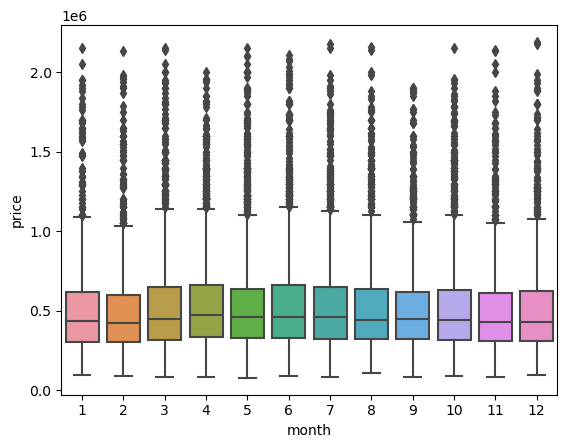

In [31]:
sns.boxplot(x='month',y='price',data=df)

##### No significant observation on month vs price

<AxesSubplot:xlabel='year'>

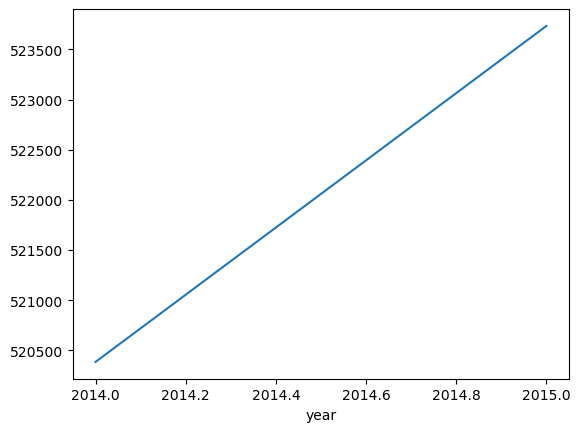

In [32]:
df.groupby('year')['price'].mean().plot()

##### Year of selling of house is directly proportional to the mean of all the houses sold on that particular

In [33]:
#We dont have any need of data column,therefore, we will drop that column
df=df.drop('date',axis=1)

In [34]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [35]:
df['zipcode'].value_counts()
# 70 categories are too much
# We can categorize it into south, north , middle zipcode which requires domain knowledge

98103    602
98038    589
98115    582
98052    573
98117    553
        ... 
98010    100
98102    100
98024     80
98148     57
98039     30
Name: zipcode, Length: 70, dtype: int64

##### The price column will try to correlate with zipcodes which will effect our model as zipcodes are random values.Therefore, we will drop the zipcodes column 

In [36]:
df=df.drop('zipcode',axis=1)

In [37]:
df['yr_renovated'].value_counts()

0       20535
2014       91
2013       36
2000       35
2005       34
        ...  
1934        1
1954        1
1948        1
1959        1
1951        1
Name: yr_renovated, Length: 70, dtype: int64

In [38]:
df['yr_renovated'].value_counts()

0       20535
2014       91
2013       36
2000       35
2005       34
        ...  
1934        1
1954        1
1948        1
1959        1
1951        1
Name: yr_renovated, Length: 70, dtype: int64

In [39]:
##### yr_renovated can be classified as renovated, not_renovated and recently_renovated  

In [40]:
def convert_reno(yr_renovated):
    if(yr_renovated in [*range(1951,2001)]):
        return "not_renovated"
    elif(yr_renovated in [*range(2001,2011)]):
        return "renovated"
    elif(yr_renovated in [*range(2011,2016)]):
        return "recently_renovated"
    else:
        return "not_renovated"



In [41]:
df['renovation']=df.apply(lambda x:convert_reno(x['yr_renovated']),axis=1)

In [42]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'renovation'],
      dtype='object')

In [43]:
#No need of yr_renovated column as we have renovation column now
df=df.drop('yr_renovated',axis=1)

In [44]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year', 'month', 'renovation'],
      dtype='object')

In [45]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year,month,renovation
8215,2190000.0,3,2.25,3360,7108,2.0,0,0,3,10,2770,590,1905,47.6187,-122.284,3450,8558,2014,12,renovated
6995,2180000.0,4,3.00,4750,21701,1.5,0,0,5,11,4750,0,1976,47.6454,-122.218,3120,18551,2014,12,not_renovated
18867,2180000.0,6,2.75,4710,11000,2.0,0,3,3,10,3690,1020,1931,47.6622,-122.272,2950,5300,2014,7,not_renovated
19308,2160000.0,3,3.50,3080,6495,2.0,0,3,3,11,2530,550,1996,47.6321,-122.393,4120,8620,2014,8,renovated
15138,2150000.0,4,3.25,3840,6214,1.5,0,3,4,10,2590,1250,1939,47.6388,-122.406,3280,5915,2015,3,not_renovated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,47.4799,-122.296,1572,10570,2014,5,not_renovated
8267,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,47.4987,-122.341,1140,11250,2014,11,not_renovated
16184,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,47.4808,-122.315,860,9000,2015,3,not_renovated
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,47.6499,-121.909,1200,7500,2014,5,not_renovated


## One Hot Encoding

In [46]:
dummies=pd.get_dummies(df['renovation'],drop_first=True)
df=pd.concat([df.drop('renovation',axis=1),dummies],axis=1)


In [47]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year,month,recently_renovated,renovated
8215,2190000.0,3,2.25,3360,7108,2.0,0,0,3,10,...,590,1905,47.6187,-122.284,3450,8558,2014,12,0,1
6995,2180000.0,4,3.00,4750,21701,1.5,0,0,5,11,...,0,1976,47.6454,-122.218,3120,18551,2014,12,0,0
18867,2180000.0,6,2.75,4710,11000,2.0,0,3,3,10,...,1020,1931,47.6622,-122.272,2950,5300,2014,7,0,0
19308,2160000.0,3,3.50,3080,6495,2.0,0,3,3,11,...,550,1996,47.6321,-122.393,4120,8620,2014,8,0,1
15138,2150000.0,4,3.25,3840,6214,1.5,0,3,4,10,...,1250,1939,47.6388,-122.406,3280,5915,2015,3,0,0


## Train Test Split

In [48]:
X=df.drop('price',axis=1)
y=df['price']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


## Standardization

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Deploying Linear Model
### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()

In [55]:
reg = model.fit(X_train,y_train)

In [56]:
reg.score(X_test,y_test)

0.7075696791356889

In [57]:
reg.score(X_train,y_train)

0.7163235914967423

In [58]:
reg.coef_

array([-1.37924858e+04,  2.12327564e+04, -1.03664880e+17,  9.48110843e+03,
        1.29967167e+04,  1.85559407e+04,  3.54590841e+04,  2.24278800e+04,
        1.08001574e+05,  9.51904610e+16,  5.13942644e+16, -6.34990379e+04,
        7.68790947e+04, -1.02104656e+04,  3.26265099e+04, -7.46229929e+03,
        1.34031642e+04,  2.07755575e+03,  6.22313790e+03,  1.16702091e+04])

In [59]:
reg.intercept_

519216.6510499634

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [61]:
predictions=model.predict(X_test)

In [62]:
mean_squared_error(y_test,predictions)

25346405630.952724

In [63]:
mean_absolute_error(y_test,predictions)

110081.2287742634

In [64]:
np.sqrt(mean_squared_error(y_test,predictions))

159205.5452267688

<AxesSubplot:ylabel='price'>

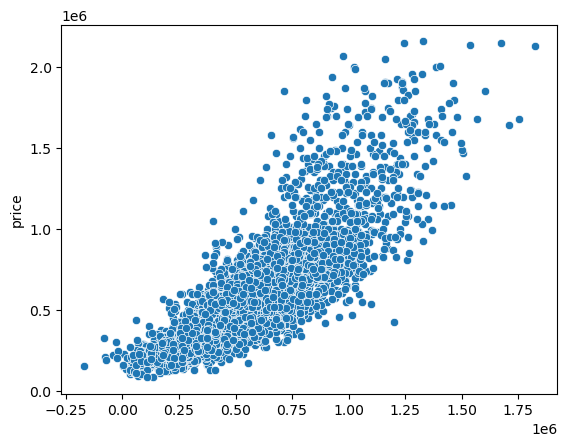

In [65]:
sns.scatterplot(x=predictions,y=y_test)

### Lasso Regression
#### Feature Selection

In [66]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [67]:
%%capture --no-display
param={'alpha':[0.1,0.01,0.001]}
model=Lasso()
grid=GridSearchCV(model,param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=Lasso(), param_grid={'alpha': [0.1, 0.01, 0.001]})

In [68]:
grid.score(X_test,y_test)

0.7075737871058434

In [69]:
grid.score(X_train,y_train)

0.7163251587448529

In [70]:
grid.best_params_

{'alpha': 0.001}

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [72]:
mean_squared_error(y_test,predictions)

25346405630.952724

In [73]:
mean_absolute_error(y_test,predictions)

110081.2287742634

In [74]:
np.sqrt(mean_squared_error(y_test,predictions))

159205.5452267688

<AxesSubplot:ylabel='price'>

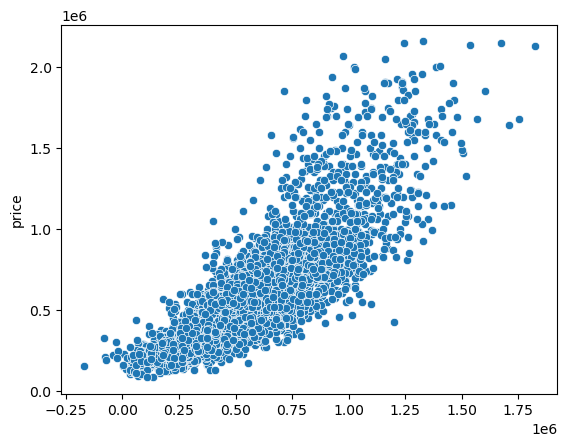

In [75]:
sns.scatterplot(x=predictions,y=y_test)

## Ridge Regression
### For Overcoming Overfitting

In [76]:
from sklearn.linear_model import Ridge

In [77]:
param={'alpha':[0.1,1,10]}
model=Ridge()
grid=GridSearchCV(model,param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10]})

In [78]:
grid.score(X_test,y_test)

0.7075681869056399

In [79]:
grid.score(X_train,y_train)

0.7163249652909449

In [80]:
grid.best_params_

{'alpha': 10}

In [81]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [82]:
mean_absolute_error(y_test,predictions)

110081.2287742634

In [83]:
mean_squared_error(y_test,predictions)

25346405630.952724

In [84]:
np.sqrt(mean_squared_error(y_test,predictions))

159205.5452267688

<AxesSubplot:ylabel='price'>

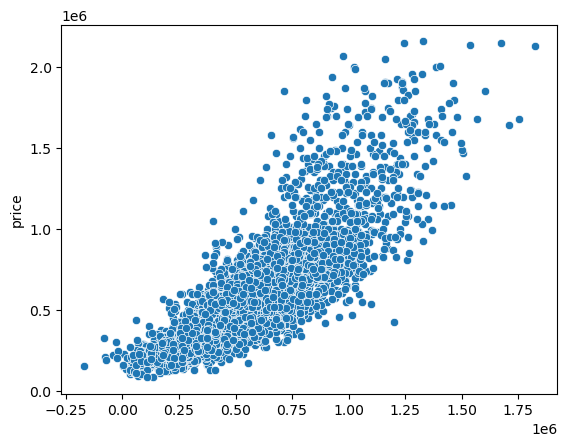

In [85]:
sns.scatterplot(x=predictions,y=y_test)

## ElasticNet
### Combining both Ridge and Lasso

In [86]:
from sklearn.linear_model import ElasticNet

In [87]:
%%capture --no-display
param={'alpha':[0.01,0.1,1,10,20]}
model=ElasticNet()
grid=GridSearchCV(model,param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 20]})

In [88]:
grid.score(X_test,y_test)

0.7075230323613785

In [89]:
grid.score(X_train,y_train)

0.7163145298854536

In [90]:
grid.best_params_

{'alpha': 0.01}

In [91]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [92]:
mean_absolute_error(y_test,predictions)

110081.2287742634

In [93]:
mean_squared_error(y_test,predictions)

25346405630.952724

In [94]:
np.sqrt(mean_squared_error(y_test,predictions))

159205.5452267688

<AxesSubplot:ylabel='price'>

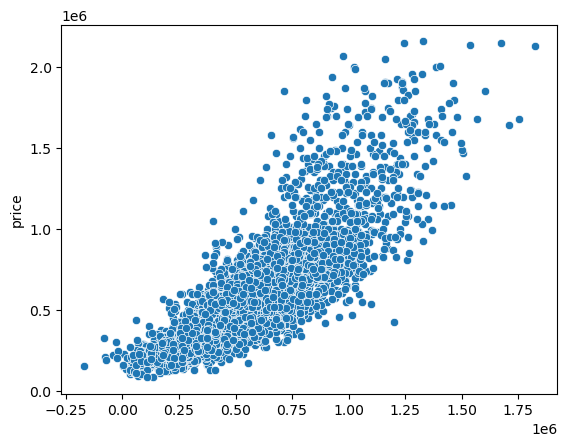

In [95]:
sns.scatterplot(x=predictions,y=y_test)

## Neural Network

In [96]:
X=df.drop('price',axis=1).values
y=df['price'].values

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [98]:
from sklearn.preprocessing import StandardScaler


In [99]:
scaler=StandardScaler()


In [100]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [102]:
X_train.shape

(14996, 20)

In [103]:
model=Sequential()
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [104]:
model.fit(x=X_train,y=y_train,epochs=100,batch_size=256,
          validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/100
59/59 [==============================] - 3s 15ms/step - loss: 355016212480.0000 - val_loss: 364088721408.0000
Epoch 2/100
59/59 [==============================] - 0s 8ms/step - loss: 354993766400.0000 - val_loss: 364012994560.0000
Epoch 3/100
59/59 [==============================] - 0s 8ms/step - loss: 354633023488.0000 - val_loss: 363025072128.0000
Epoch 4/100
59/59 [==============================] - 1s 13ms/step - loss: 351773523968.0000 - val_loss: 356714250240.0000
Epoch 5/100
59/59 [==============================] - 0s 8ms/step - loss: 338897862656.0000 - val_loss: 332973965312.0000
Epoch 6/100
59/59 [==============================] - 0s 7ms/step - loss: 301177077760.0000 - val_loss: 273875533824.0000
Epoch 7/100
59/59 [==============================] - 1s 11ms/step - loss: 228698865664.0000 - val_loss: 182844637184.0000
Epoch 8/100
59/59 [==============================] - 1s 12ms/step - loss: 158205214720.0000 - val_loss: 117906710528.0000
Epoch 9/100
59/59 [=========

In [105]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

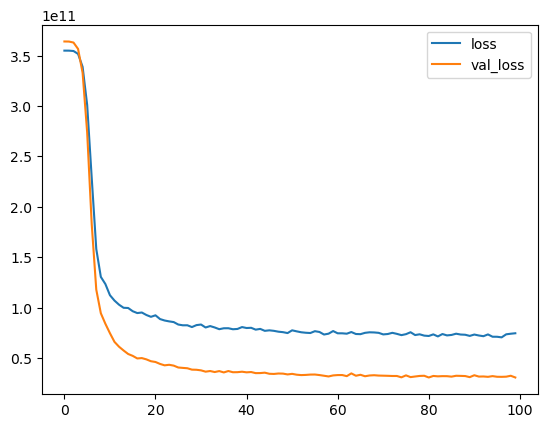

In [106]:
losses.plot()

In [107]:
predictions=model.predict(X_test)

201/201 [==============================] - 1s 3ms/step


In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [109]:
mean_squared_error(y_test,predictions)

30765126469.139954

In [110]:
np.sqrt(mean_squared_error(y_test,predictions))

175399.90441599436

In [111]:
mean_absolute_error(y_test,predictions)

115915.6903525105

In [112]:
r2_score(y_test,predictions)

0.6450520071447488